# July 2023 Cu-J Light

dTHF + LiBF4 + dEtOH



In [1]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [2]:
project_dir = os.path.expanduser('~/git/nh3-analysis/july2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-J')

# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

# Directory with fit results
fit_dir = '/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/'

dynamic_run = 207245 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-J/30s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207245-dyn/results-30s-bck'

# dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/15s'
# dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207168-dyn/results-15s-bck'

delta_t = 30

## Summary of 60 Hz data

/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207232/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207246/__model-profile.dat


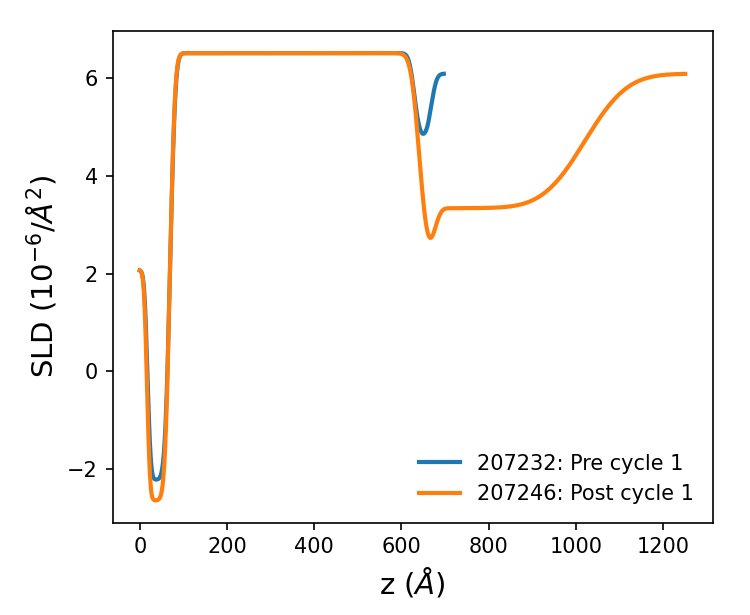

In [3]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207232, "207232: Pre cycle 1", fit_dir=fit_dir, show_cl=False)
summary_plots.plot_sld(207246, "207246: Post cycle 1", fit_dir=fit_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


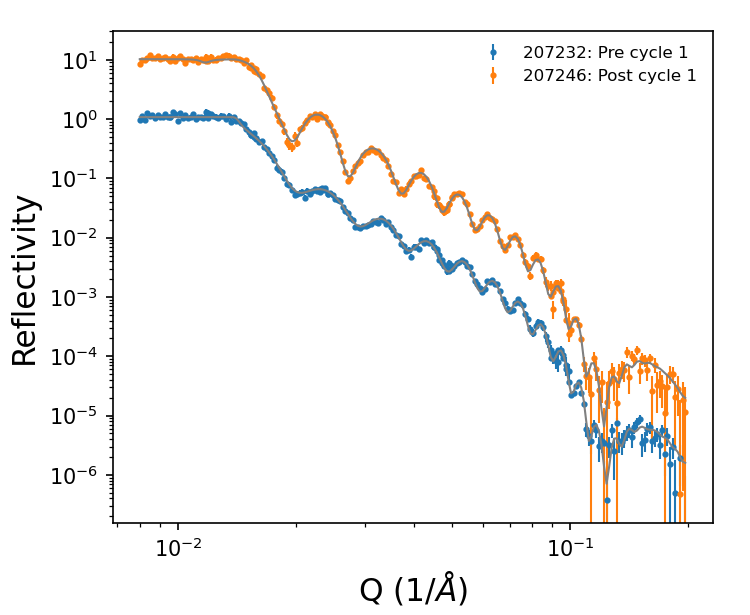

In [4]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(207232, '207232: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(207246, '207246: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


## CP 1: Change as a function of time

/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-J/30s
22
Ref r207245_t000090.txt
Skipped: 0


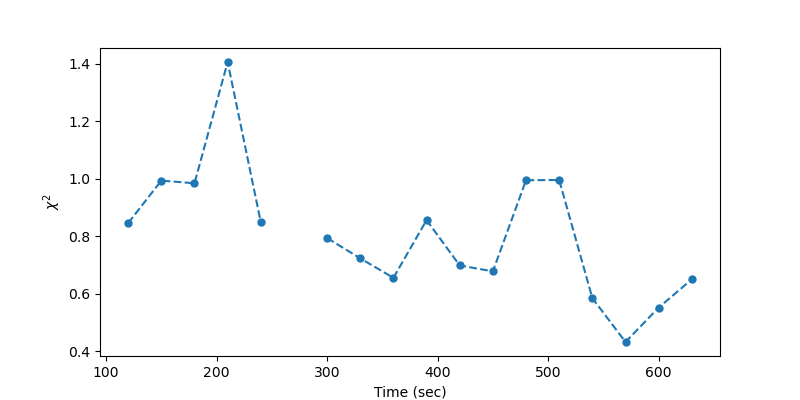

In [5]:
importlib.reload(summary_plots)
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(207245, dyn_data_dir, first=3, last=None, out_array=None)

22


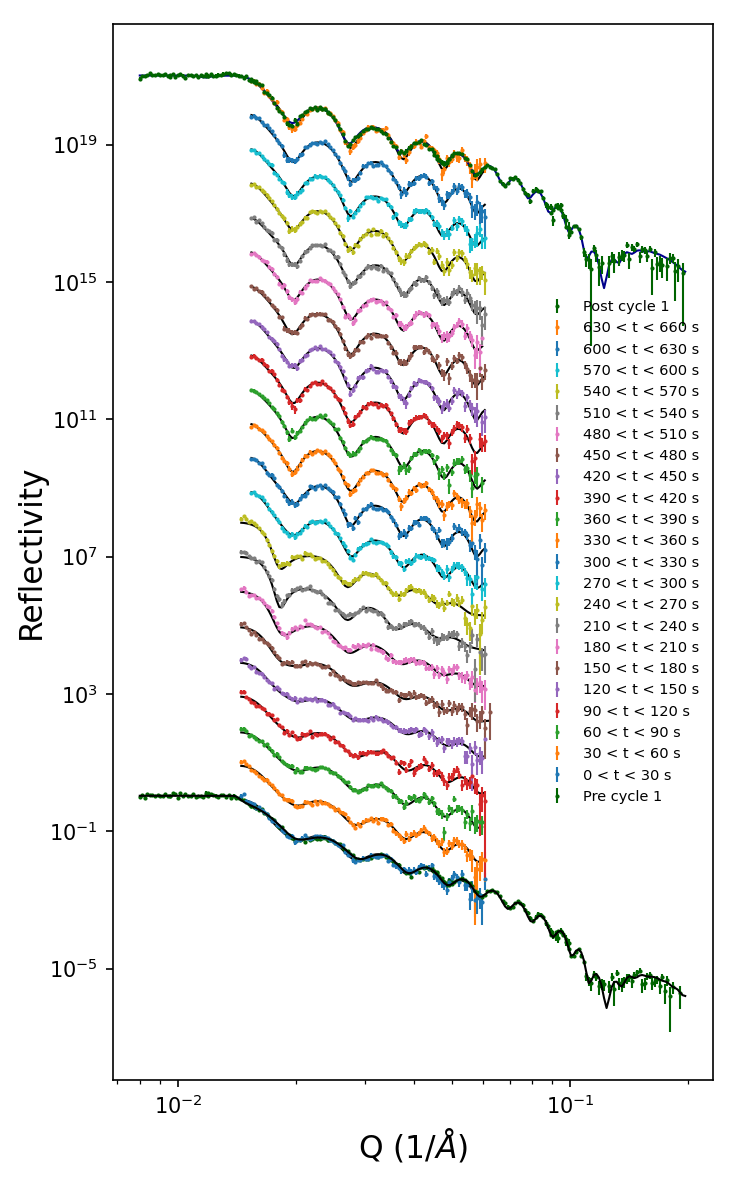

In [6]:
importlib.reload(summary_plots)

last_time = 24

file_list = summary_plots.plot_dyn_data(dynamic_run, 207232, 207246, first_index=0, last_index=last_time, delta_t=delta_t, model_name='model-loop-207245',
                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207246/__model-profile.dat
/SNS/users/m2d/git/nh3-analysis/pec-july2023/dyn-fitting/207232/__model-profile.dat


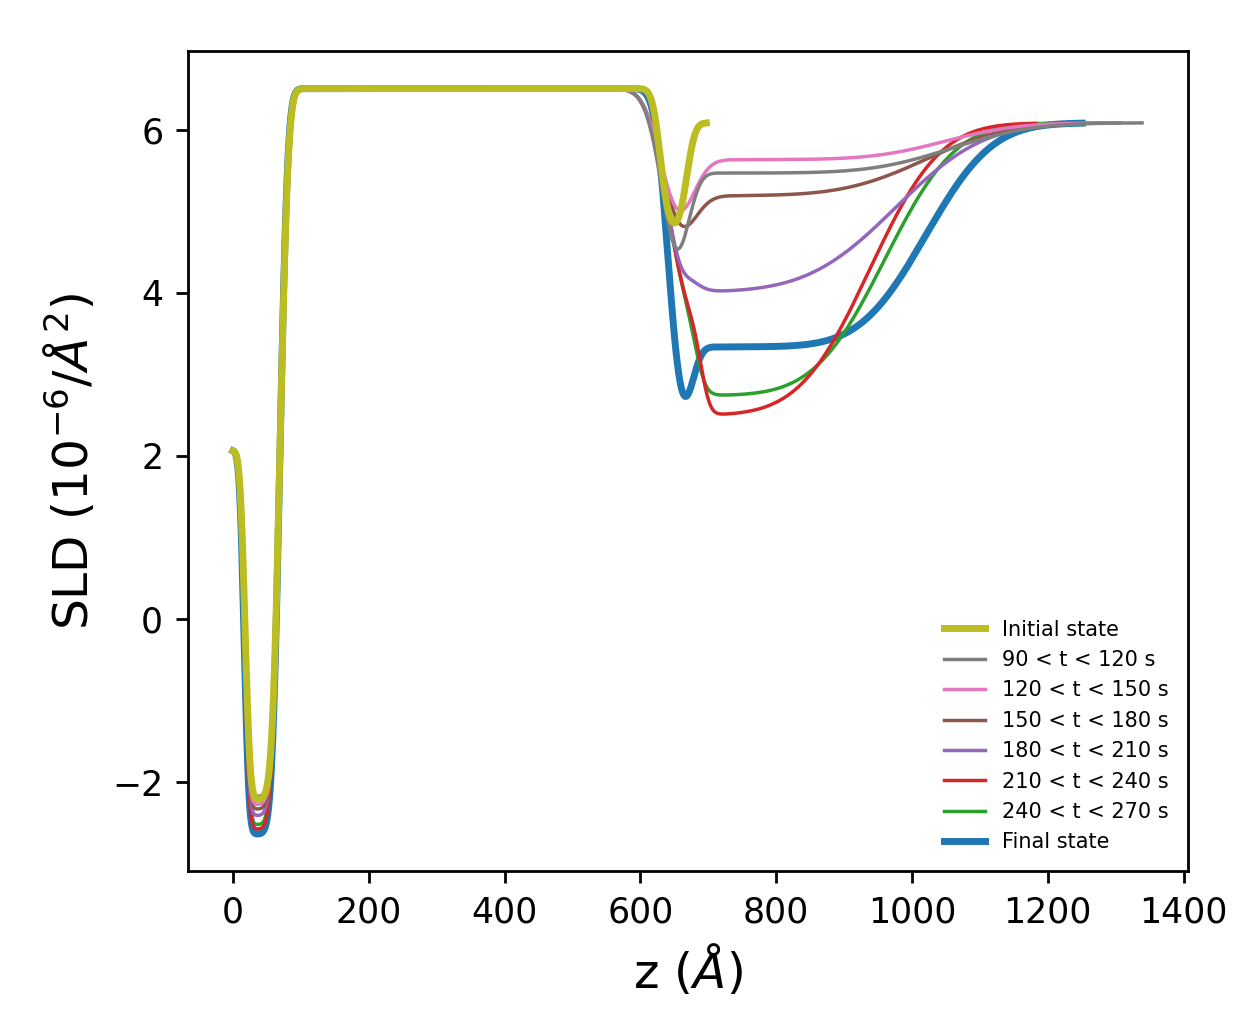

In [7]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-207245.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, 207232, 207246, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=False, model_file=model_file, model_name='model-loop-207245')

THF interface 9.522674806470334
Ti rho -2.2137524960744863
THF interface [9.522674806470334, 76.61861627483573]
Ti rho [-2.2137524960744863, -2.6374180728935306]
SEI interface [11.2006646055978]
SEI rho [3.3378343337671343]
SEI thickness [345.07404684581263]
Plated interface [15.198912760631046]
Plated rho [2.3321974882012633]
Plated thickness [34.883058616387345]


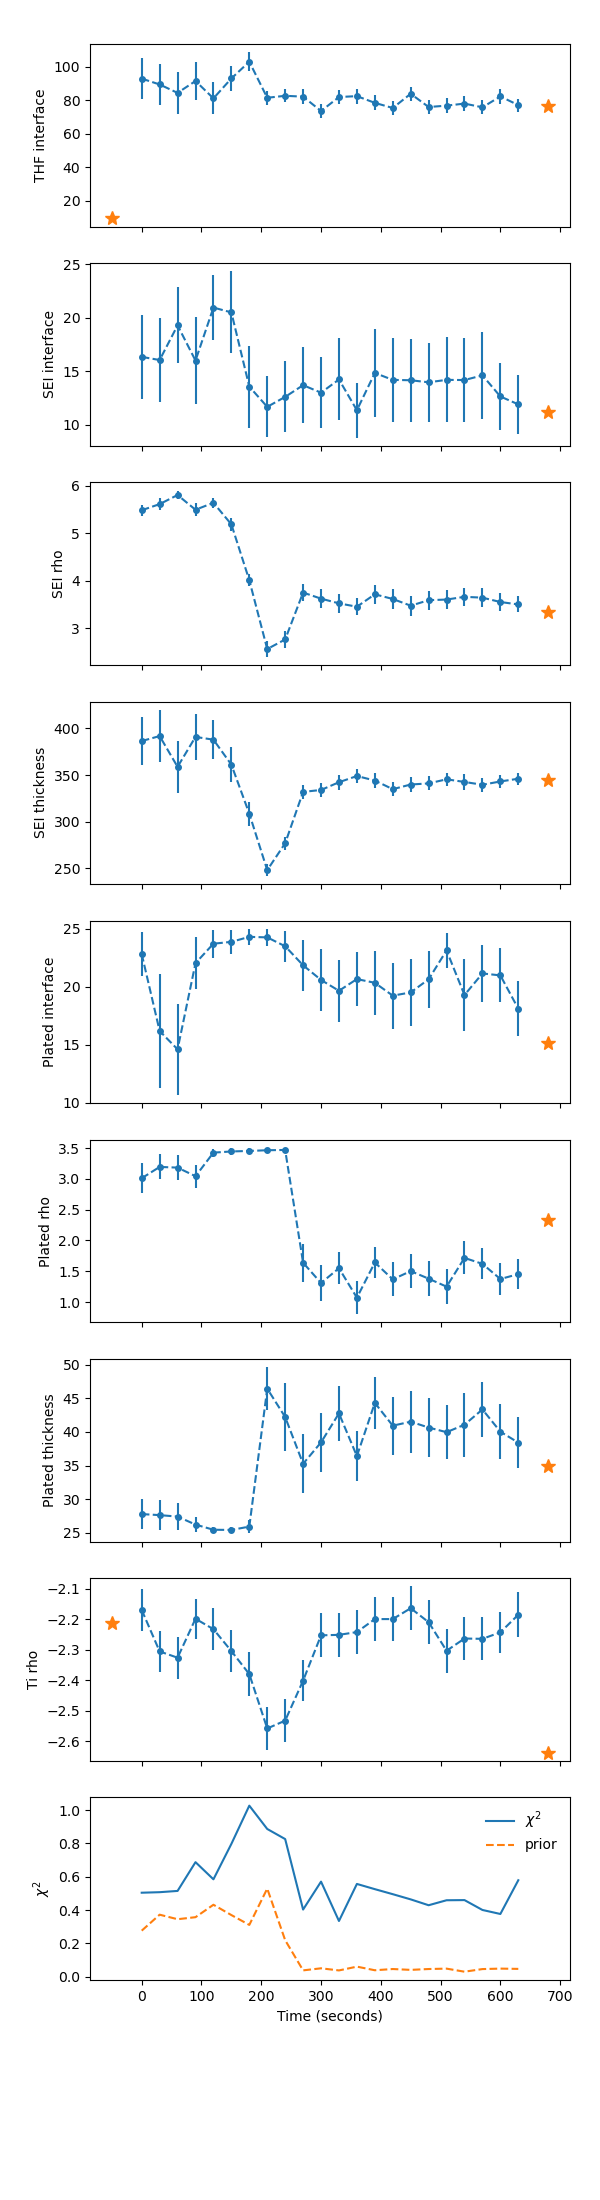

In [8]:
importlib.reload(summary_plots)

timestamps, trend_data, trend_err = summary_plots.trend_data(file_list, 207232, 207246, 
                                                   fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207245', model_file=None, add_plot=0)


In [10]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207245.json')
summary_plots.write_md_table(trend_file)

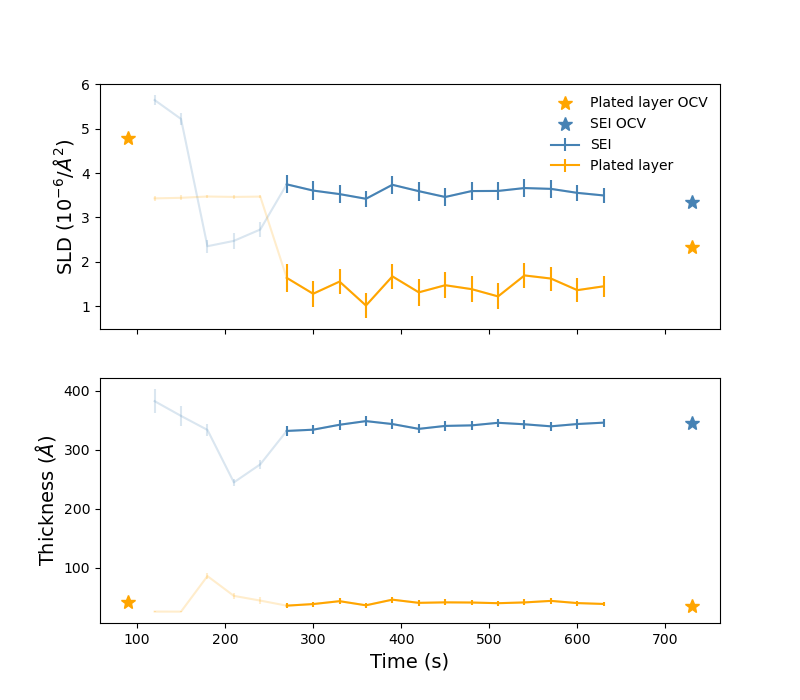

In [34]:
material_rho = [4.79, 2.3321974882012633]
material_thickness = [41.1, 34.883058616387345]
sei_rho = [3.3378343337671343]
sei_thickness = [345.07404684581263]


i_start = 5

fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8,7), sharex=True)
plt.subplot(2, 1, 1)
plt.errorbar(timestamps, trend_data['SEI rho'], yerr=trend_err['SEI rho'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['Plated rho'], yerr=trend_err['Plated rho'], alpha=0.2, color='orange')

plt.errorbar(timestamps[i_start:], trend_data['SEI rho'][i_start:], yerr=trend_err['SEI rho'][i_start:], label='SEI', color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['Plated rho'][i_start:], yerr=trend_err['Plated rho'][i_start:], label='Plated layer', color='orange')

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_rho, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_rho, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')

#plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.legend(frameon=False)



plt.subplot(2, 1, 2)
plt.errorbar(timestamps, trend_data['SEI thickness'], yerr=trend_err['SEI thickness'], alpha=0.2, color='steelblue')
plt.errorbar(timestamps, trend_data['Plated thickness'], yerr=trend_err['Plated thickness'], alpha=0.2, color='orange')
plt.errorbar(timestamps[i_start:], trend_data['SEI thickness'][i_start:], yerr=trend_err['SEI thickness'][i_start:], color='steelblue')
plt.errorbar(timestamps[i_start:], trend_data['Plated thickness'][i_start:], yerr=trend_err['Plated thickness'][i_start:], color='orange')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Thickness ($\AA$)', fontsize=14)

plt.plot([timestamps[0]-30, timestamps[-1]+100], material_thickness, linestyle='', marker='*', color='orange', markersize=10, label='Plated layer OCV')
plt.plot([timestamps[-1]+100], sei_thickness, linestyle='', marker='*', color='steelblue', markersize=10, label='SEI OCV')


In [4]:

def func(V, A_B_C, AB_AC_BC, ABC, IA0_IB0_IC0):
    K_J = 1.380649*10**(-23)
    return (3.8135*(10**(-14)) * exp(9.6710 * V))**3 - A_B_C * (3.8135*(10**(-14)) * exp(9.6710 * V))**2 + AB_AC_BC * (3.8135*(10**(-14)) * exp(9.6710 * V)) - ABC + IA0_IB0_IC0 * exp(q * V / (K_J * 300))


In [50]:
from scipy.optimize import newton, ridder

K_J = 1.380649 * 10**(-23)
q = 1.60217663*10**(-19) 

def func(V, A_B_C, AB_AC_BC, ABC, IA0_IB0_IC0):

    value = (3.8135 * (10**(-14)) * np.exp(9.6710 * V))**3 - A_B_C * (3.8135 * (10**(-14)) * np.exp(9.6710 * V))**2 
    #value += AB_AC_BC * (3.8135 * (10**(-14)) * np.exp(9.6710 * V)) - ABC + IA0_IB0_IC0 * np.exp(q * V / (K_J * 300))
    value += AB_AC_BC * (3.8135 * (10**(-14)) * np.exp(9.6710 * V)) - ABC + IA0_IB0_IC0 * np.exp(38.681726975260666 * V)
    return value


# Initial guess for the root
initial_guess = 3

# Values for other parameters
A_B_C_value = 90
AB_AC_BC_value = 2000
ABC_value = 10000
IA0_IB0_IC0_value = 1e-50


# Use the Newton-Raphson method to find the root
#root = newton(func, initial_guess, args=(A_B_C_value, AB_AC_BC_value, ABC_value, IA0_IB0_IC0_value), maxiter=500, tol=1.48e-8)
root = ridder(func, 0, 5, args=(A_B_C_value, AB_AC_BC_value, ABC_value, IA0_IB0_IC0_value), maxiter=500)

print("Root found at V =", root)


Root found at V = 3.208139888004014
